In [ ]:
import os
import zipfile
import random
import math
from google.colab import files
from PIL import Image, ImageDraw

In [ ]:
label = ['circle','square','triangle']
base_dir = '/tmp/dataset_shapes'
#os.makedirs(base_dir, exist_ok = True)
train_dir = os.path.join(base_dir, 'train')
#os.makedirs(train_dir, exist_ok = True)
val_dir = os.path.join(base_dir, 'val')
#os.makedirs(val_dir, exist_ok = True)
test_dir = os.path.join(base_dir, 'test')
#os.makedirs(test_dir, exist_ok = True)

In [ ]:
# Create directory
try:
  os.mkdir(base_dir)
  for par_dir in [train_dir, val_dir, test_dir]:
    os.mkdir(par_dir)
    for ch_dir in [os.path.join(par_dir, lb) for lb in label]:
      os.mkdir(ch_dir)
  print('\nCreate directory successfully!')
except OSError as err:
  print('\nUnable create directory, {}'.format(err))


Create directory successfully!


In [ ]:
# global parameter
size_img = (224, 224)

In [ ]:
def createCircle(width_box, height_box, size_img, width_line, rotate, path_file, show):

  # center box position
  # (x0, y0) = coordinate upper left of box
  # (x1, y1) = coordinate bottom right of box
  # size_img = (width_canvas, height_canvas)

  x0 = math.floor((size_img[0] - width_box) / 2)
  y0 = math.floor((size_img[1] - height_box) / 2)
  
  x1 = x0 + width_box
  y1 = y0 + height_box

  im = Image.new(
      mode='RGB', # 3 channel (0-255)
      size=size_img,
      color=(255,255,255) # white background
  )

  draw = ImageDraw.Draw(im)

  draw.ellipse(
      xy=[(x0, y0), (x1, y1)],
      fill=None,
      outline=0, #black
      width=width_line
  )

  im = im.rotate(rotate, fillcolor=(255,255,255))
  im.save(path_file)

  if show is True:
    return im


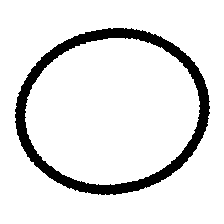

In [ ]:
width_box = random.randrange(120, 200)
height_box = random.randrange(120, 200)
rotate = random.randrange(-40, 40)

# Test random circle size
createCircle(
    width_box=width_box,
    height_box=height_box,
    size_img=size_img,
    width_line=10,
    rotate=rotate,
    path_file='/tmp/sample-circle.png',
    show=True
)

In [ ]:
def createSquare(length_shape, size_img, width_line, rotate, path_file, show):

  im = Image.new(
      mode='RGB',
      size=size_img,
      color=(255,255,255)
  )

  y_top_shape = math.floor((size_img[1] - length_shape) / 2) 
  y_bot_shape = size_img[1] - y_top_shape

  x_left_shape = math.floor((size_img[0] - length_shape) / 2)
  x_right_shape = size_img[0] - x_left_shape

  point = [
      (x_left_shape, y_top_shape),
      (x_right_shape, y_top_shape),
      (x_right_shape, y_bot_shape),
      (x_left_shape, y_bot_shape)
  ]

  draw = ImageDraw.Draw(im)

  for i,_ in enumerate(point):
      j = 0 if (i == 3) else i + 1
      draw.line(
          xy=[point[i], point[j]],
          fill=0,
          width=width_line
      )

  # pretty corners
  for p in point:
    draw.ellipse(
        xy=(p[0] - 4, p[1] - 4, p[0]  + 4, p[1] + 4),
        fill=0
    )

  im = im.rotate(rotate, fillcolor=(255,255,255))
  im.save(path_file)

  if show is True:
    return im
     

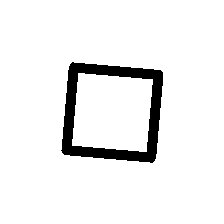

In [ ]:
length_shape = random.randrange(70, 120)
rotate = random.randrange(-10, 10)

createSquare(
    length_shape=length_shape,
    size_img=size_img,
    width_line=10,
    rotate=rotate,
    path_file='/tmp/sample-square.png',
    show=True
)

In [ ]:
def createTriangle(height_shape, width_shape, size_img, width_line, rotate, path_file, show):

  im = Image.new(
      mode='RGB',
      size=size_img,
      color=(255,255,255)
  )

  y_top_shape = math.floor((size_img[1] - height_shape) / 2)
  y_bot_shape = size_img[1] - y_top_shape

  x_min_top = math.floor((size_img[0] - (width_shape / 2)) / 2)
  x_max_top = size_img[0] - x_min_top
  x_top_shape = random.randrange(x_min_top, x_max_top)

  x_left_bot_shape = math.floor((size_img[0] - width_shape) / 2)
  x_right_bot_shape = size_img[0] - x_left_bot_shape

  point = [
      (x_left_bot_shape, y_bot_shape),
      (x_top_shape, y_top_shape),
      (x_right_bot_shape, y_bot_shape)
  ]

  draw = ImageDraw.Draw(im)

  for i,_ in enumerate(point):
      j = 0 if (i == 2) else i + 1
      draw.line(
          xy=[point[i], point[j]],
          fill=0,
          width=width_line
      )

  # pretty corners
  for p in point:
    draw.ellipse(
        xy=(p[0] - 4, p[1] - 4, p[0]  + 4, p[1] + 4),
        fill=0
    )

  im = im.rotate(rotate, fillcolor=(255,255,255))
  im.save(path_file)

  if show is True:
    return im

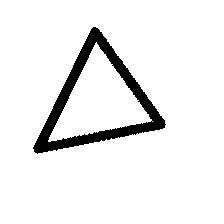

In [ ]:
height_shape = random.randrange(70, 180)
width_shape = random.randrange(70, 180)
rotate = random.randrange(-180, 180)

createTriangle(
    height_shape=height_shape,
    width_shape=width_shape,
    size_img=size_img,
    width_line=10,
    rotate=rotate,
    path_file='/tmp/sample-triangle.png',
    show=True
)

In [ ]:
num_train = 3200
num_val = 400
num_test = 400

In [ ]:
def split_dataset(name, num, size_img, base_class_dir):
  for i in range(num):
    # balance flip image (~50%)
    flip = True if i % 2 == 0 else False

    # circle generator
    width_box = random.randrange(120, 200)
    height_box = random.randrange(120, 200)
    rotate = random.randrange(-40, 40)

    createCircle(
        width_box=width_box,
        height_box=height_box,
        size_img=size_img,
        width_line=10,
        rotate=rotate,
        path_file=os.path.join(base_class_dir, 'circle', 'circle-{}-{}.png'.format(name,i)),
        show=False
    )
    # square generator
    length_shape = random.randrange(70, 120)
    rotate = random.randrange(-10, 10)

    createSquare(
        length_shape=length_shape,
        size_img=size_img,
        width_line=10,
        rotate=rotate,
        path_file=os.path.join(base_class_dir, 'square', 'square-{}-{}.png'.format(name,i)),
        show=False
    )
    # triangle generator
    height_shape = random.randrange(70, 180)
    width_shape = random.randrange(70, 180)
    rotate = random.randrange(-180, 180)

    createTriangle(
        height_shape=height_shape,
        width_shape=width_shape,
        size_img=size_img,
        width_line=10,
        rotate=rotate,
        path_file=os.path.join(base_class_dir, 'triangle', 'triangle-{}-{}.png'.format(name,i)),
        show=False
    )

In [ ]:
def len_class_dir(base_dir, label):
  for lb in label:
    print('\n{} : train({}), val({}), test({})'.format(
        lb,
        len(os.listdir(os.path.join(base_dir, 'train', lb))),
        len(os.listdir(os.path.join(base_dir, 'val', lb))),
        len(os.listdir(os.path.join(base_dir, 'test', lb)))
    ))

In [ ]:
split_dataset(
    name='train',
    num=num_train,
    size_img=size_img,
    base_class_dir=train_dir
)

# show result
len_class_dir(
    base_dir=base_dir,
    label=label
)


circle : train(3200), val(0), test(0)

square : train(3200), val(0), test(0)

triangle : train(3200), val(0), test(0)


In [ ]:
split_dataset(
    name='val',
    num=num_val,
    size_img=size_img,
    base_class_dir=val_dir
)

# show result
len_class_dir(
    base_dir=base_dir,
    label=label
)
     


circle : train(3200), val(400), test(0)

square : train(3200), val(400), test(0)

triangle : train(3200), val(400), test(0)


In [ ]:
split_dataset(
    name='test',
    num=num_test,
    size_img=size_img,
    base_class_dir=test_dir
)

# show result
len_class_dir(
    base_dir=base_dir,
    label=label
)


circle : train(3200), val(400), test(400)

square : train(3200), val(400), test(400)

triangle : train(3200), val(400), test(400)


In [ ]:
!cd /tmp && zip -r 'dataset_shapes.zip' 'dataset_shapes'

Streaming output truncated to the last 5000 lines.
  adding: dataset_shapes/train/circle/circle-train-2648.png (deflated 9%)
  adding: dataset_shapes/train/circle/circle-train-2143.png (deflated 9%)
  adding: dataset_shapes/train/circle/circle-train-2824.png (deflated 4%)
  adding: dataset_shapes/train/circle/circle-train-673.png (deflated 2%)
  adding: dataset_shapes/train/circle/circle-train-135.png (deflated 1%)
  adding: dataset_shapes/train/circle/circle-train-1767.png (deflated 8%)
  adding: dataset_shapes/train/circle/circle-train-876.png (deflated 7%)
  adding: dataset_shapes/train/circle/circle-train-2722.png (deflated 6%)
  adding: dataset_shapes/train/circle/circle-train-119.png (deflated 4%)
  adding: dataset_shapes/train/circle/circle-train-67.png (deflated 7%)
  adding: dataset_shapes/train/circle/circle-train-387.png (deflated 0%)
  adding: dataset_shapes/train/circle/circle-train-2776.png (deflated 4%)
  adding: dataset_shapes/train/circle/circle-train-1320.png (deflate

In [ ]:
files.download('/tmp/dataset_shapes.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>